In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
sns.set_style()

In [2]:
rain_df=pd.read_csv("testset.csv")
rain_df

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [3]:
temp_list=[(x[:4]+'-'+x[4:6]+'-'+x[6:8]) for x in rain_df['datetime_utc']]

In [4]:
rain_df['Date']=temp_list

In [5]:
rain_df.drop([' _vism',' _wgustm',' _windchillm',' _tornado',' _snow',' _precipm'],axis=1,inplace=True)

In [6]:
rain_df.drop(' _heatindexm',axis=1,inplace=True)

In [7]:
rain_df[' _wspdm'][2]

nan

In [30]:
rain_df[' _wspdm'].fillna(0,inplace=True)

In [29]:
grounded_df=rain_df.groupby('Date').mean()
grounded_df.columns=['dewPoint','fog','hail','humidity','pressure','rain','maximumTemp','thunder','dunnoWhat','averageWindSpeed']

TypeError: agg function failed [how->mean,dtype->object]

In [17]:
maxWindSpeed=rain_df.groupby('Date').max()[' _wspdm']

TypeError: agg function failed [how->max,dtype->object]

In [18]:
grounded_df['maxWindSpeed']=maxWindSpeed
grounded_df

NameError: name 'maxWindSpeed' is not defined

In [13]:
grounded_df.drop('dunnoWhat',axis=1,inplace=True)

NameError: name 'grounded_df' is not defined

In [8]:
var='maxWindSpeed'
for i in range(len(grounded_df)):
    if math.isnan(grounded_df[var][i]):
        grounded_df[var][i]=(grounded_df[var][i-1]+grounded_df[var][i+1])/2

NameError: name 'grounded_df' is not defined

In [15]:
grounded_df

,dewPoint,fog,hail,humidity,pressure,rain,maximumTemp,thunder,averageWindSpeed,maxWindSpeed
Date,,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,52.916667,-2659.666667,0.0,22.333333,0.0,0.616667,7.4
1996-11-02,10.458333,0.0,0.0,48.625000,1009.833333,0.0,22.916667,0.0,7.025000,22.2
1996-11-03,12.041667,0.0,0.0,55.958333,1010.500000,0.0,21.791667,0.0,4.404167,24.1
1996-11-04,10.222222,0.0,0.0,48.055556,1011.333333,0.0,22.722222,0.0,1.855556,11.1
1996-11-05,8.200000,0.0,0.0,29.400000,1011.800000,0.0,27.800000,0.0,10.020000,14.8
...,...,...,...,...,...,...,...,...,...,...
2017-04-20,16.750000,0.0,0.0,27.500000,998.625000,0.0,34.500000,0.0,5.562500,11.1
2017-04-21,21.500000,0.0,0.0,39.375000,999.875000,0.0,34.250000,0.0,6.962500,18.5
2017-04-22,20.400000,0.0,0.0,40.900000,1001.600000,0.0,32.900000,0.2,8.890000,18.5


In [9]:
df=pd.read_csv("Dataset.csv")
df.head()

,Date,dewPoint,fog,hail,humidity,pressure,rain,maximumTemp,thunder,averageWindSpeed,maxWindSpeed
0,01-11-96,11.666667,0.0,0.0,52.916667,-2659.666667,0.0,22.333333,0.0,0.616667,7.4
1,02-11-96,10.458333,0.0,0.0,48.625000,1009.833333,0.0,22.916667,0.0,7.025000,22.2
2,03-11-96,12.041667,0.0,0.0,55.958333,1010.500000,0.0,21.791667,0.0,4.404167,24.1
3,04-11-96,10.222222,0.0,0.0,48.055556,1011.333333,0.0,22.722222,0.0,1.855556,11.1
4,05-11-96,8.200000,0.0,0.0,29.400000,1011.800000,0.0,27.800000,0.0,10.020000,14.8


In [10]:
l=list(df.columns)
l.remove('Date')

dewPoint


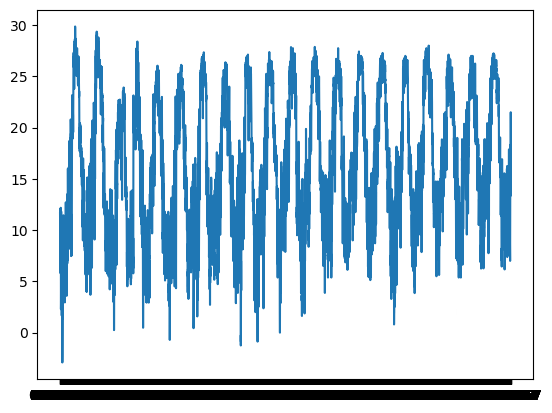

fog


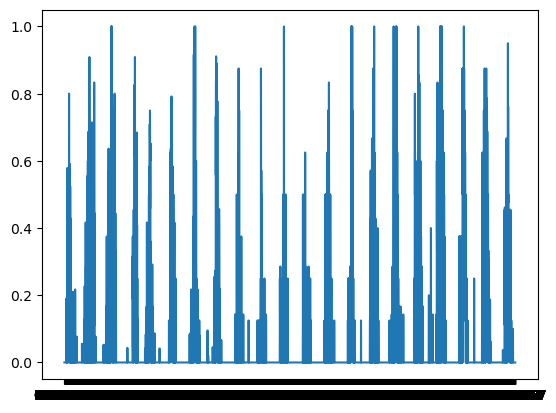

hail


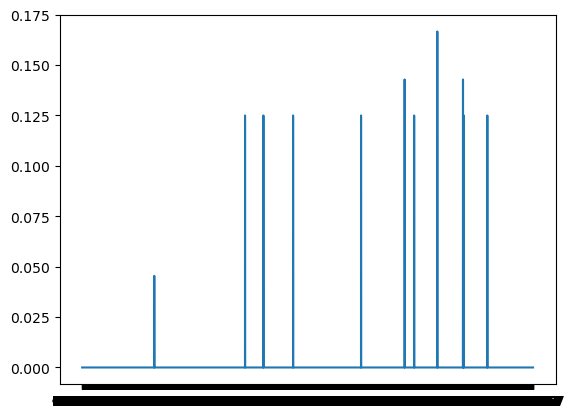

humidity


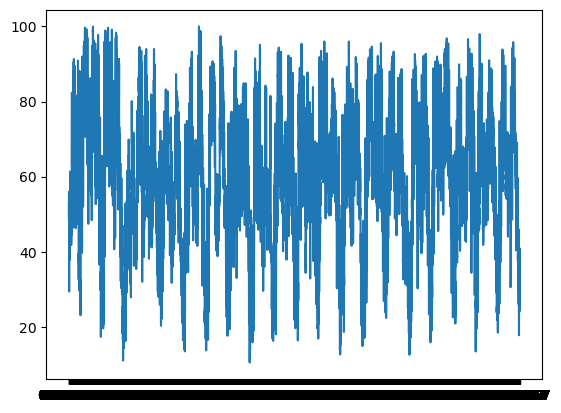

pressure


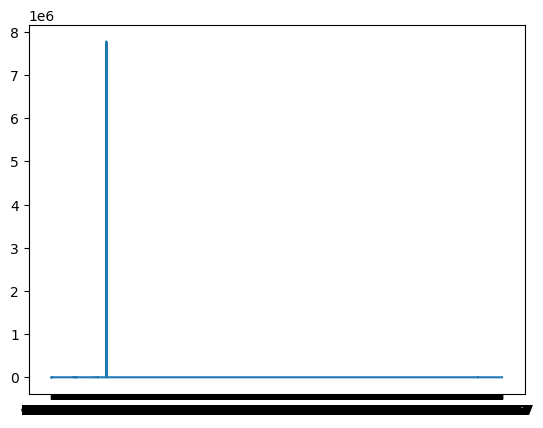

rain


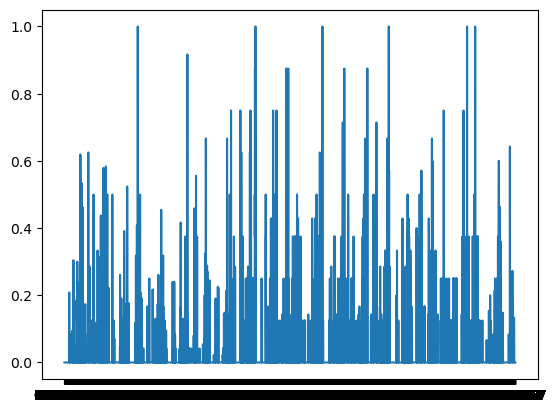

maximumTemp


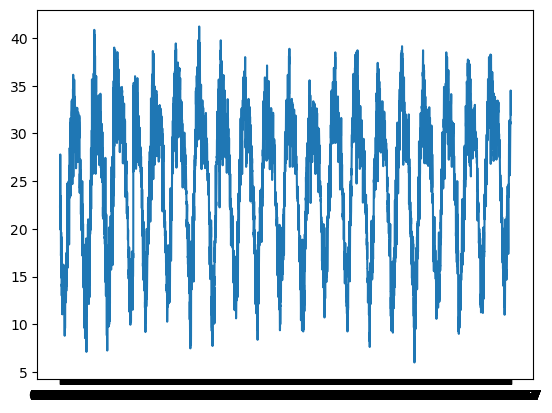

thunder


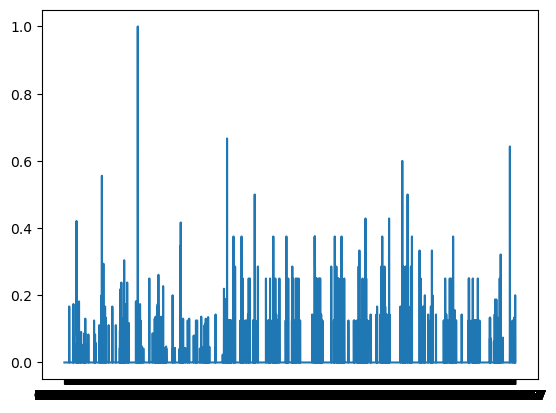

averageWindSpeed


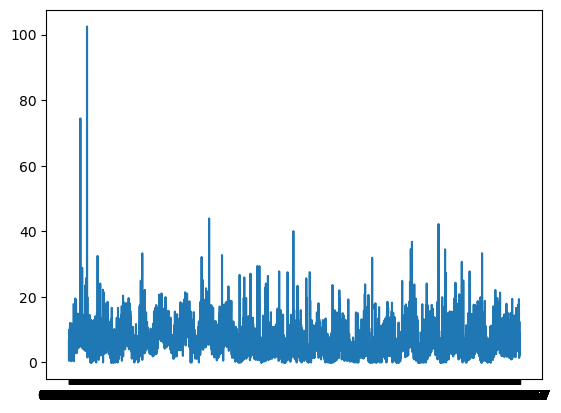

maxWindSpeed


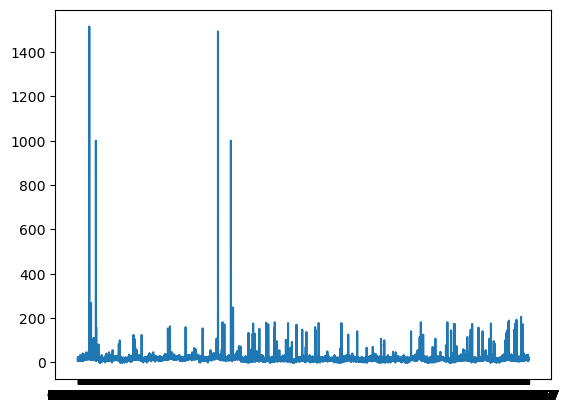

In [11]:
for i in l:
    print(i)
    plt.plot(df['Date'],df[i])
    plt.show()

In [12]:
df.drop(['fog','hail','thunder','maxWindSpeed'],axis=1)

,Date,dewPoint,humidity,pressure,rain,maximumTemp,averageWindSpeed
0,01-11-96,11.666667,52.916667,-2659.666667,0.0,22.333333,0.616667
1,02-11-96,10.458333,48.625000,1009.833333,0.0,22.916667,7.025000
2,03-11-96,12.041667,55.958333,1010.500000,0.0,21.791667,4.404167
3,04-11-96,10.222222,48.055556,1011.333333,0.0,22.722222,1.855556
4,05-11-96,8.200000,29.400000,1011.800000,0.0,27.800000,10.020000
...,...,...,...,...,...,...,...
7334,20-04-17,16.750000,27.500000,998.625000,0.0,34.500000,5.562500
7335,21-04-17,21.500000,39.375000,999.875000,0.0,34.250000,6.962500
7336,22-04-17,20.400000,40.900000,1001.600000,0.0,32.900000,8.890000
7337,23-04-17,15.125000,27.500000,1002.125000,0.0,32.875000,9.962500


/var/folders/73/1fbt52l13hl2_rtlv49ngykr0000gn/T/ipykernel_80621/2676255678.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/var/folders/73/1fbt52l13hl2_rtlv49ngykr0000gn/T/ipykernel_80621/2676255678.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


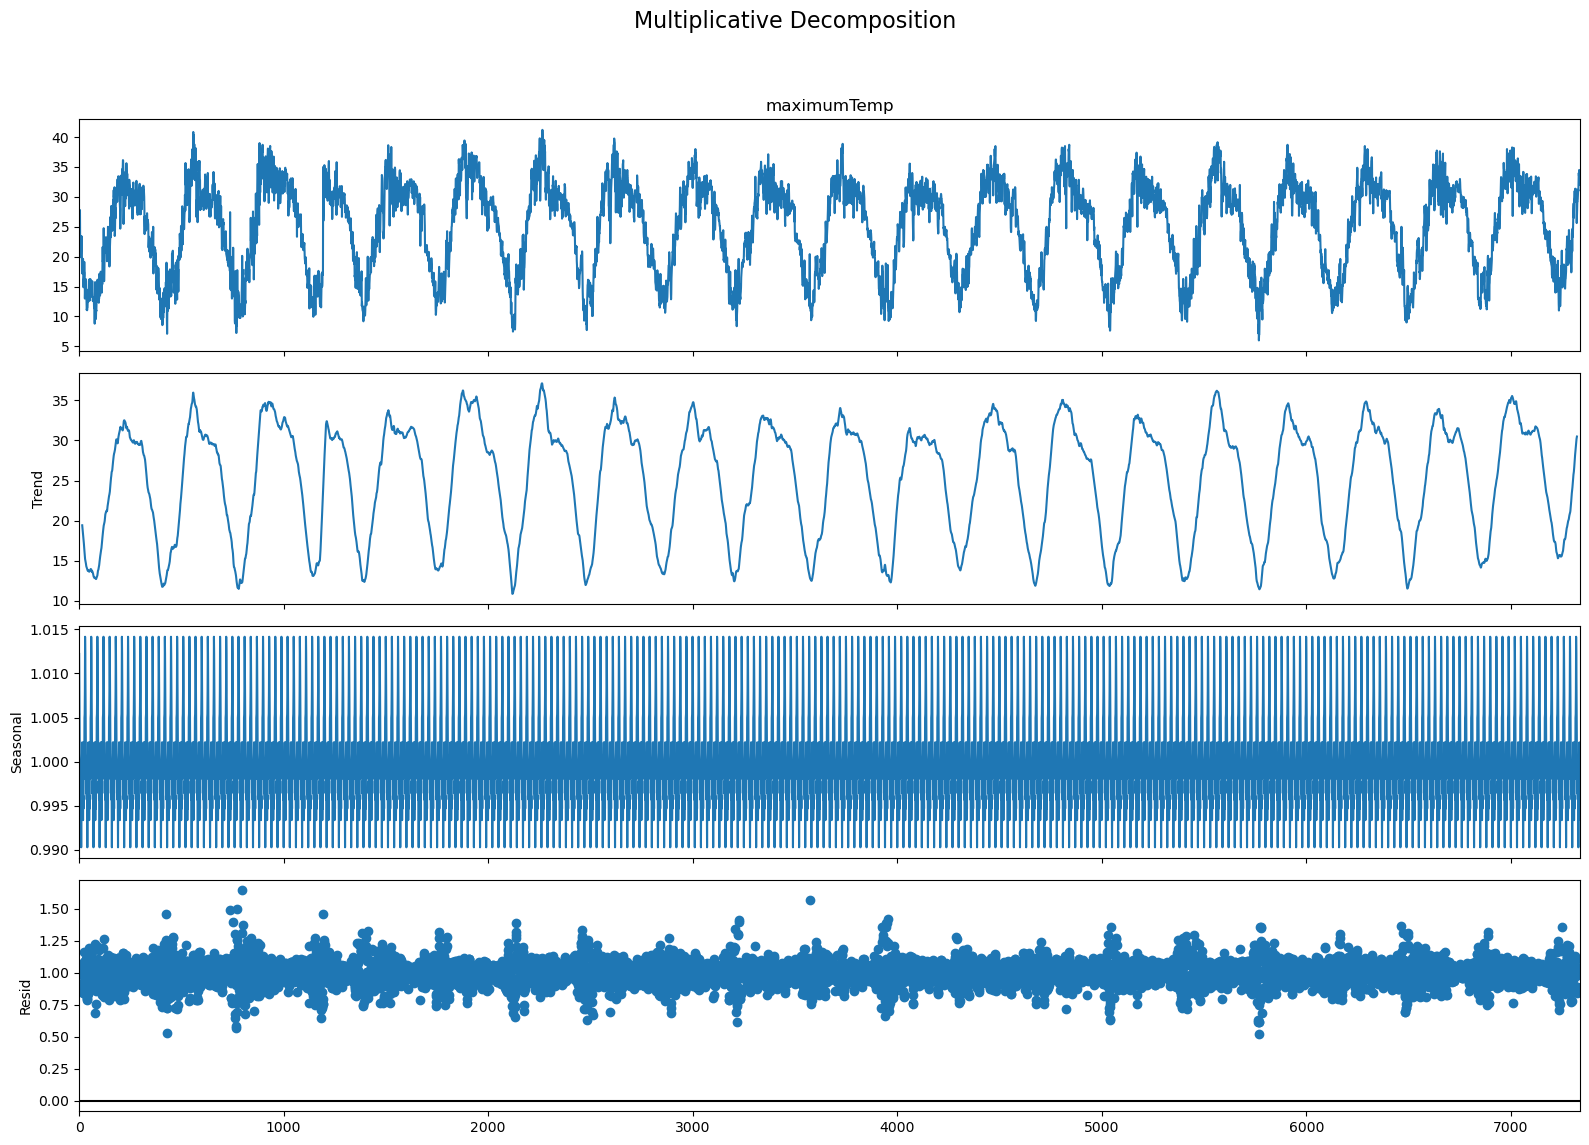

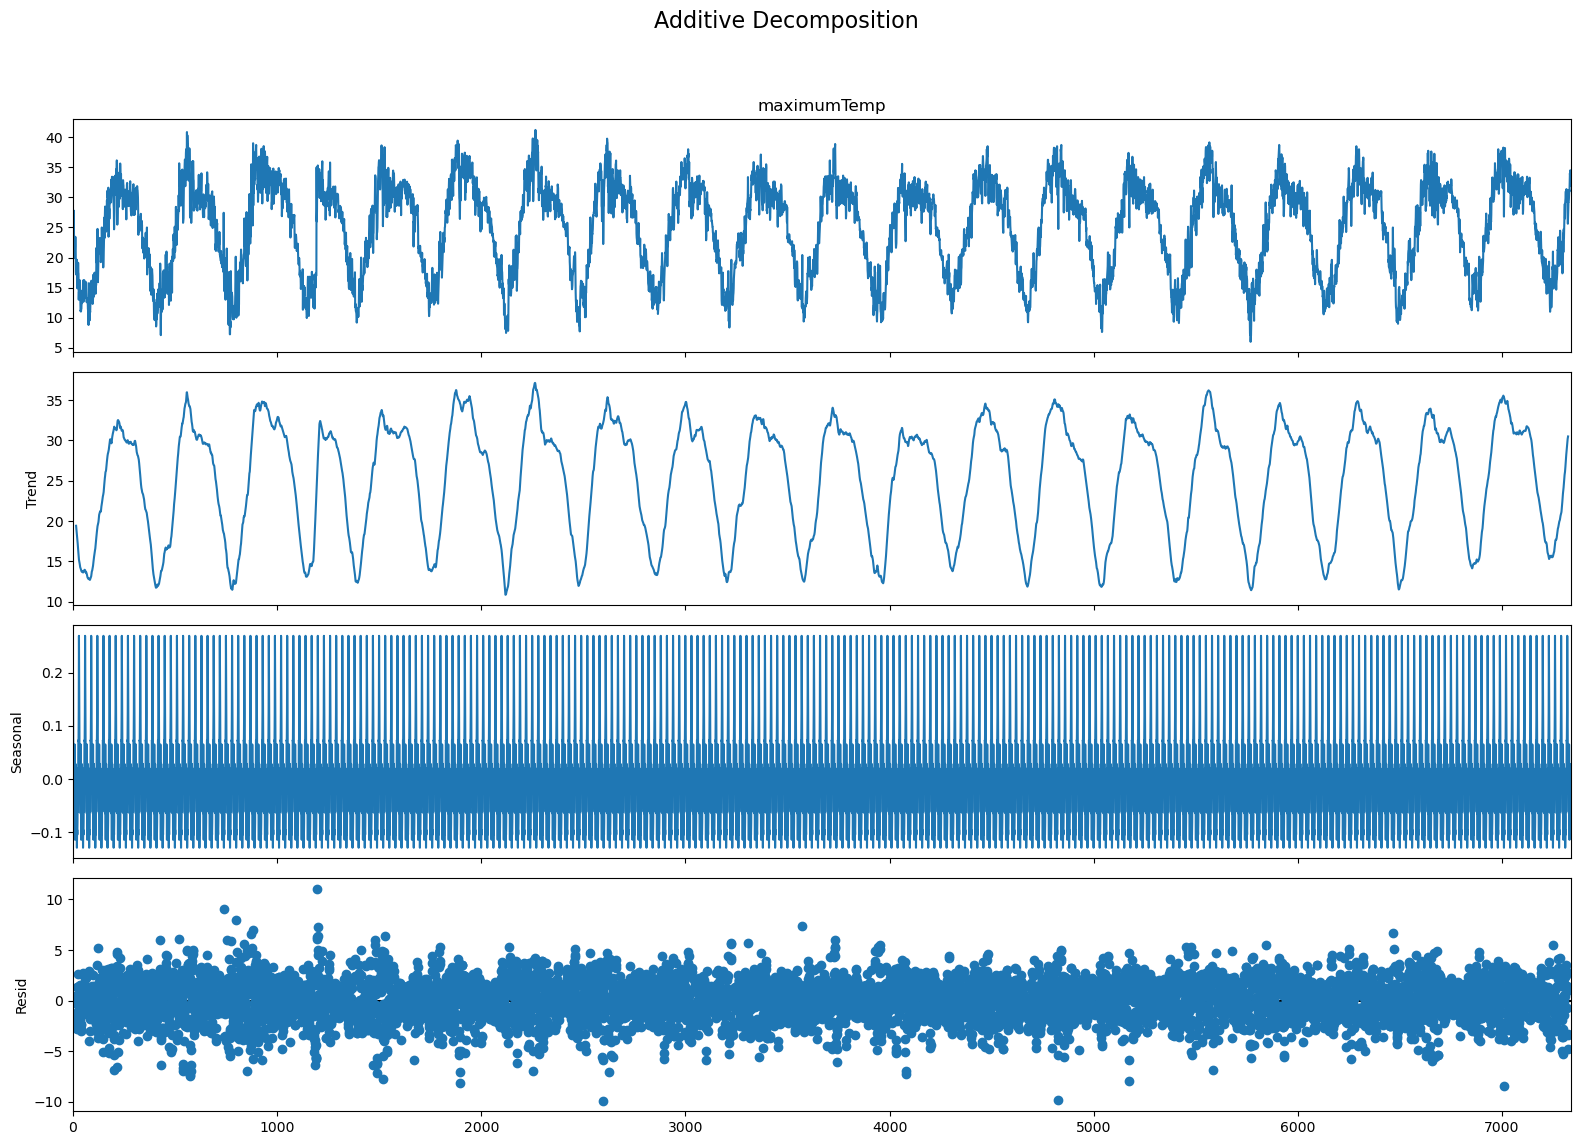

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['maximumTemp'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['maximumTemp'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

#Since the multiplicative Decompositon reveals less of a patter, we choose it for time series

In [14]:
dfMaxTemp=df[['Date','maximumTemp']]
dfMaxTemp

,Date,maximumTemp
0,01-11-96,22.333333
1,02-11-96,22.916667
2,03-11-96,21.791667
3,04-11-96,22.722222
4,05-11-96,27.800000
...,...,...
7334,20-04-17,34.500000
7335,21-04-17,34.250000
7336,22-04-17,32.900000
7337,23-04-17,32.875000


In [15]:
from datetime import datetime
from dateutil import parser
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [16]:
dfMaxTemp['Date']=pd.to_datetime(dfMaxTemp['Date'],dayfirst=True)
dfMaxTemp=dfMaxTemp.set_index(['Date'])
dfMaxTemp

/var/folders/73/1fbt52l13hl2_rtlv49ngykr0000gn/T/ipykernel_80621/1693794078.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfMaxTemp['Date']=pd.to_datetime(dfMaxTemp['Date'],dayfirst=True)
/var/folders/73/1fbt52l13hl2_rtlv49ngykr0000gn/T/ipykernel_80621/1693794078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMaxTemp['Date']=pd.to_datetime(dfMaxTemp['Date'],dayfirst=True)


,maximumTemp
Date,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000


In [17]:
df2012to16=pd.read_csv("df2012-16.csv")
df2012to16['Date']=pd.to_datetime(df2012to16['Date'],dayfirst=True)
df2012to16=df2012to16.set_index(['Date'])
df2012to16

/var/folders/73/1fbt52l13hl2_rtlv49ngykr0000gn/T/ipykernel_80621/1750806810.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2012to16['Date']=pd.to_datetime(df2012to16['Date'],dayfirst=True)


,maximumTemp
Date,
2012-01-01,16.285714
2012-01-02,14.428571
2012-01-03,14.166667
2012-01-04,14.750000
2012-01-05,14.625000
...,...
2016-12-27,16.850000
2016-12-28,17.217391
2016-12-29,15.238095


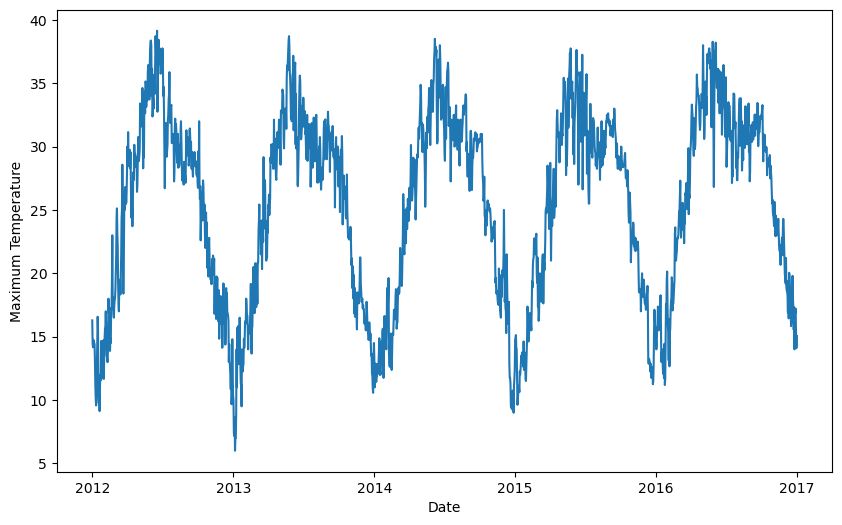

In [18]:
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.plot(df2012to16)
plt.show()

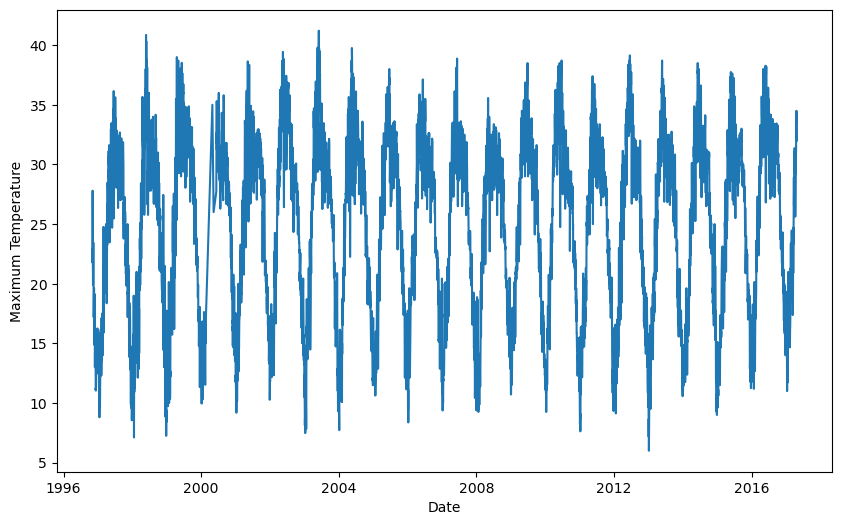

In [19]:
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.plot(dfMaxTemp)
plt.show()

In [20]:
rollingMean=dfMaxTemp.rolling(window=30).mean()
rollingStd=dfMaxTemp.rolling(window=30).std()
print(rollingMean)
print(rollingStd)

            maximumTemp
Date                   
1996-11-01          NaN
1996-11-02          NaN
1996-11-03          NaN
1996-11-04          NaN
1996-11-05          NaN
...                 ...
2017-04-20    29.870973
2017-04-21    30.104306
2017-04-22    30.267639
2017-04-23    30.399584
2017-04-24    30.582917

[7339 rows x 1 columns]
            maximumTemp
Date                   
1996-11-01          NaN
1996-11-02          NaN
1996-11-03          NaN
1996-11-04          NaN
1996-11-05          NaN
...                 ...
2017-04-20     2.138550
2017-04-21     2.222933
2017-04-22     2.242912
2017-04-23     2.276870
2017-04-24     2.171018

[7339 rows x 1 columns]


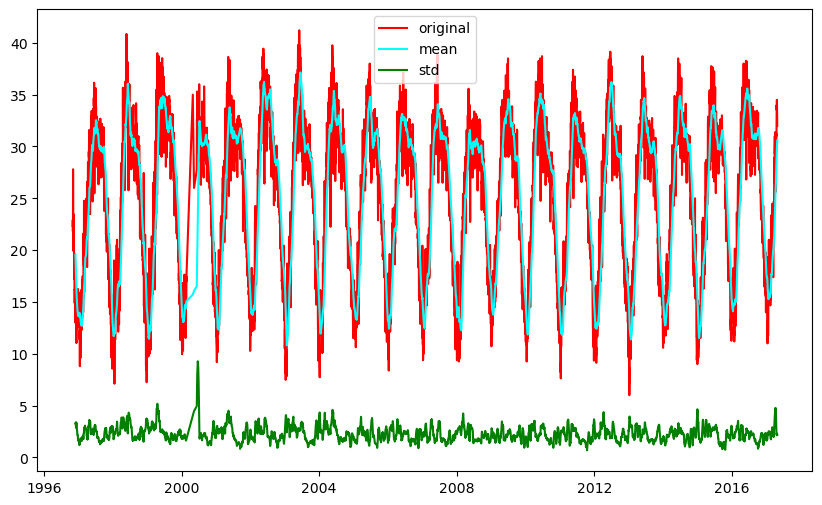

In [21]:
plt.plot(dfMaxTemp,color='red',label='original')
plt.plot(rollingMean,color='cyan',label='mean')
plt.plot(rollingStd,color='green',label='std')
plt.legend()
plt.show()

In [22]:
print("Results of Dickey Fuller test")
dftest=adfuller(dfMaxTemp['maximumTemp'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller test
Test Statistic                -7.382304e+00
p-value                        8.410248e-11
#Lags Used                     3.600000e+01
Number of Observations Used    7.302000e+03
Critical Value (1%)           -3.431246e+00
Critical Value (5%)           -2.861936e+00
Critical Value (10%)          -2.566981e+00
dtype: float64


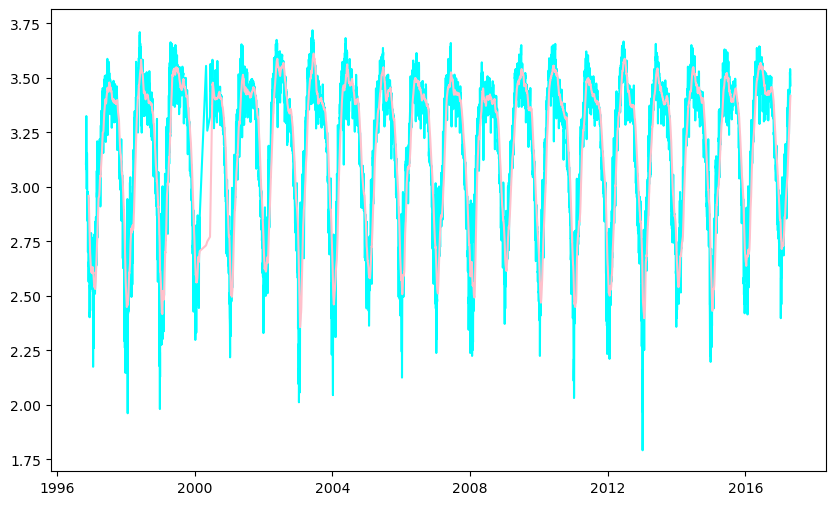

In [23]:
dfMaxTemp_log=np.log(dfMaxTemp)
plt.plot(dfMaxTemp_log,color='cyan')
movingAvg=dfMaxTemp_log.rolling(window=30).mean()
movingStd=dfMaxTemp_log.rolling(window=30).std()
plt.plot(movingAvg,color='pink')
plt.show()

In [24]:
dfMaxTemp.to_csv('dfMaxTemp.csv')

In [25]:
df2016=pd.read_csv('df2016.csv')
#df2016['Date']=pd.to_datetime(df2016['Date'],dayfirst=True)
df2016=df2016.set_index('Date')
df2016

,maximumTemp
Date,
01-01-16,14.714286
02-01-16,14.000000
03-01-16,14.375000
04-01-16,15.750000
05-01-16,15.833333
...,...
27-12-16,16.850000
28-12-16,17.217391
29-12-16,15.238095


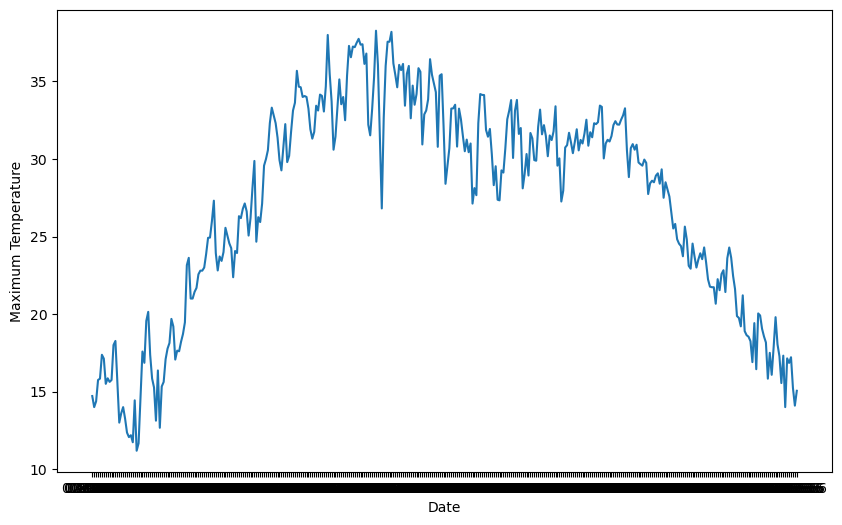

In [26]:
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.plot(df2016)
plt.show()

In [27]:
rollingMean=df2016.rolling(window=30).mean()
rollingStd=df2016.rolling(window=30).std()
print(rollingMean)
print(rollingStd)

          maximumTemp
Date                 
01-01-16          NaN
02-01-16          NaN
03-01-16          NaN
04-01-16          NaN
05-01-16          NaN
...               ...
27-12-16    18.339379
28-12-16    18.164807
29-12-16    17.952373
30-12-16    17.759896
31-12-16    17.603317

[366 rows x 1 columns]
          maximumTemp
Date                 
01-01-16          NaN
02-01-16          NaN
03-01-16          NaN
04-01-16          NaN
05-01-16          NaN
...               ...
27-12-16     1.867238
28-12-16     1.707194
29-12-16     1.659410
30-12-16     1.761132
31-12-16     1.786726

[366 rows x 1 columns]


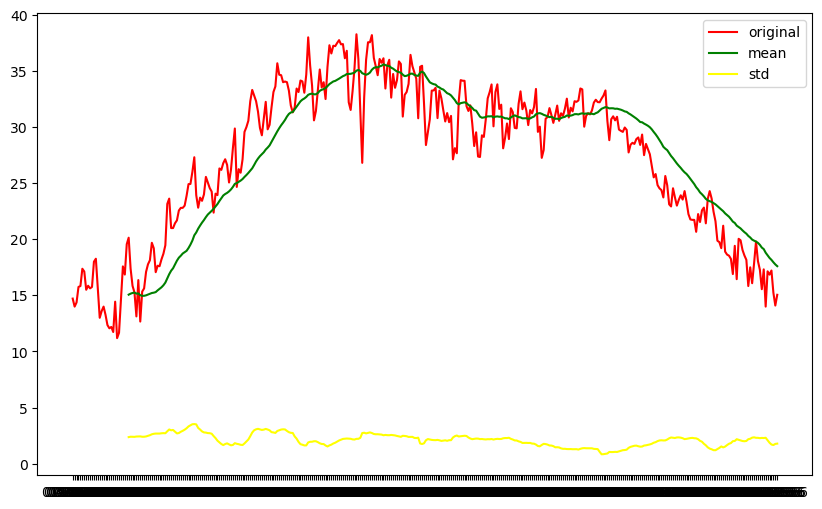

In [28]:
plt.plot(df2016,color='red',label='original')
plt.plot(rollingMean,color='green',label='mean')
plt.plot(rollingStd,color='yellow',label='std')
plt.legend()
plt.show()

In [29]:
print("Results of Dickey Fuller test")
dftest=adfuller(df2016['maximumTemp'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller test
Test Statistic                  -0.766902
p-value                          0.828652
#Lags Used                      11.000000
Number of Observations Used    354.000000
Critical Value (1%)             -3.448958
Critical Value (5%)             -2.869739
Critical Value (10%)            -2.571138
dtype: float64


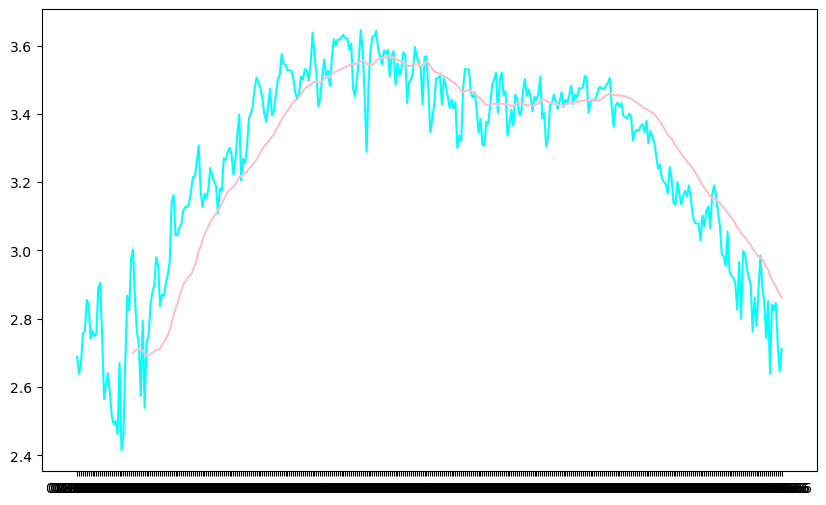

In [30]:
df2016_log=np.log(df2016)
plt.plot(df2016_log,color='cyan')
movingAvg=df2016_log.rolling(window=30).mean()
movingStd=df2016_log.rolling(window=30).std()
plt.plot(movingAvg,color='pink')
plt.show()

In [31]:
dflogscaleminusmovingaverage=df2016_log-movingAvg
dflogscaleminusmovingaverage.dropna(inplace=True)
dflogscaleminusmovingaverage

,maximumTemp
Date,
30-01-16,0.302408
31-01-16,0.149051
01-02-16,0.052816
02-02-16,0.013555
03-02-16,-0.131521
...,...
27-12-16,-0.079614
28-12-16,-0.049192
29-12-16,-0.159667


In [34]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=30).mean()
    movingSTD = timeseries.rolling(window=30).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['maximumTemp'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

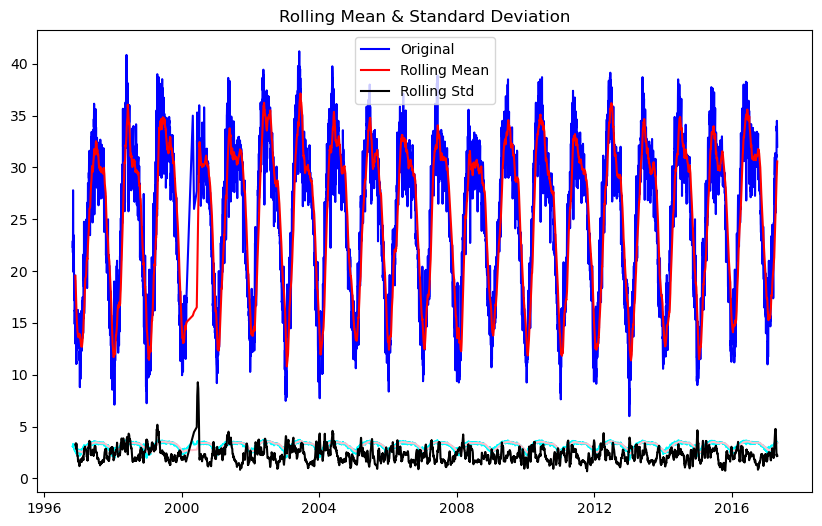

Results of Dickey Fuller Test:
Test Statistic                -7.382304e+00
p-value                        8.410248e-11
#Lags Used                     3.600000e+01
Number of Observations Used    7.302000e+03
Critical Value (1%)           -3.431246e+00
Critical Value (5%)           -2.861936e+00
Critical Value (10%)          -2.566981e+00
dtype: float64


In [35]:
dfMaxTemp_log=np.log(dfMaxTemp)
plt.plot(dfMaxTemp_log,color='cyan')
movingAvg=dfMaxTemp_log.rolling(window=30).mean()
movingStd=dfMaxTemp_log.rolling(window=30).std()
plt.plot(movingAvg,color='pink')
test_stationarity(dfMaxTemp)

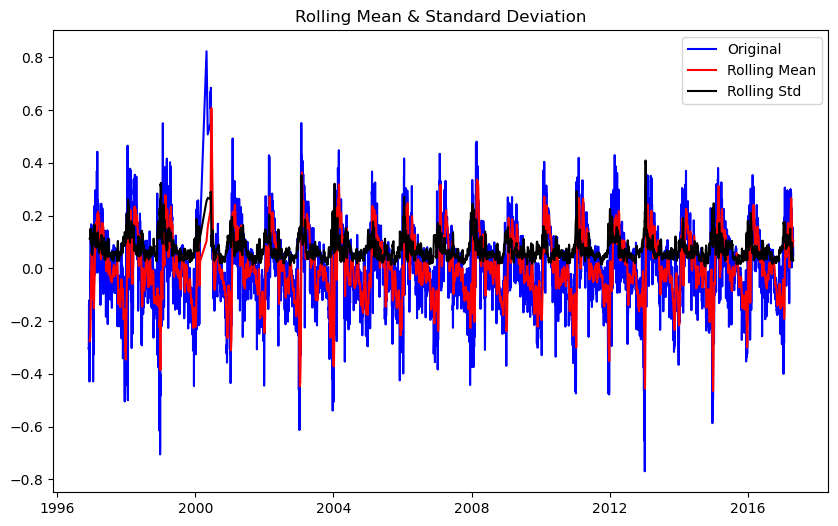

Results of Dickey Fuller Test:
Test Statistic                -8.185168e+00
p-value                        7.935558e-13
#Lags Used                     3.200000e+01
Number of Observations Used    7.277000e+03
Critical Value (1%)           -3.431249e+00
Critical Value (5%)           -2.861937e+00
Critical Value (10%)          -2.566981e+00
dtype: float64


In [54]:
dfMaxTemp_log=np.log(dfMaxTemp)
movingAvg=dfMaxTemp_log.rolling(window=30).mean()
dflogscaleminusmovingaverage=dfMaxTemp_log-movingAvg
dflogscaleminusmovingaverage.dropna(inplace=True)
test_stationarity(dflogscaleminusmovingaverage)

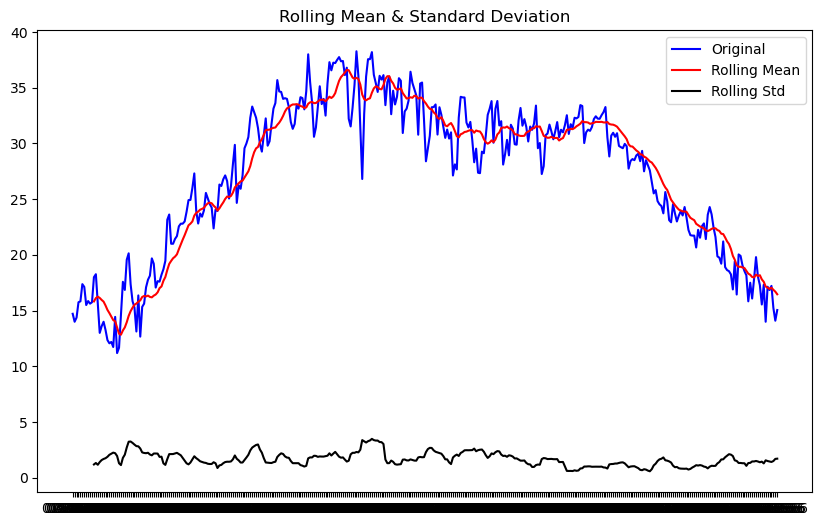

Results of Dickey Fuller Test:
Test Statistic                  -0.766902
p-value                          0.828652
#Lags Used                      11.000000
Number of Observations Used    354.000000
Critical Value (1%)             -3.448958
Critical Value (5%)             -2.869739
Critical Value (10%)            -2.571138
dtype: float64


In [51]:
test_stationarity(df2016)

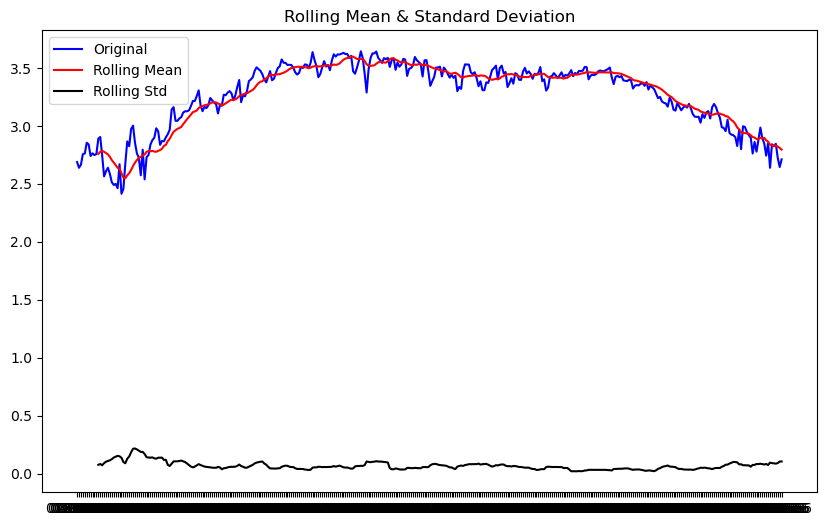

Results of Dickey Fuller Test:
Test Statistic                  -1.102788
p-value                          0.713959
#Lags Used                       5.000000
Number of Observations Used    360.000000
Critical Value (1%)             -3.448646
Critical Value (5%)             -2.869602
Critical Value (10%)            -2.571065
dtype: float64


In [53]:
df2016_log=np.log(df2016)
test_stationarity(df2016_log)

In [54]:
test_stationarity(dflogscaleminusmovingaverage)

NameError: name 'dflogscaleminusmovingaverage' is not defined

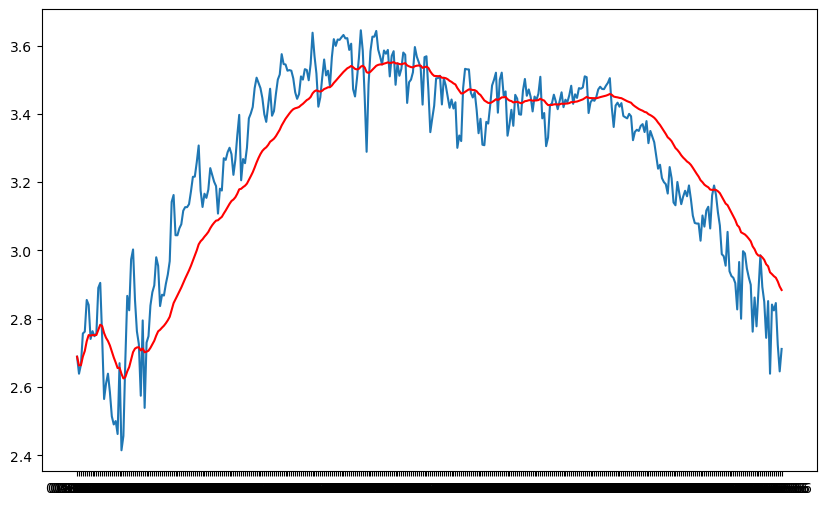

In [36]:
exponentialDecayWeightedAverage = df2016_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df2016_log)
plt.plot(exponentialDecayWeightedAverage, color='red')

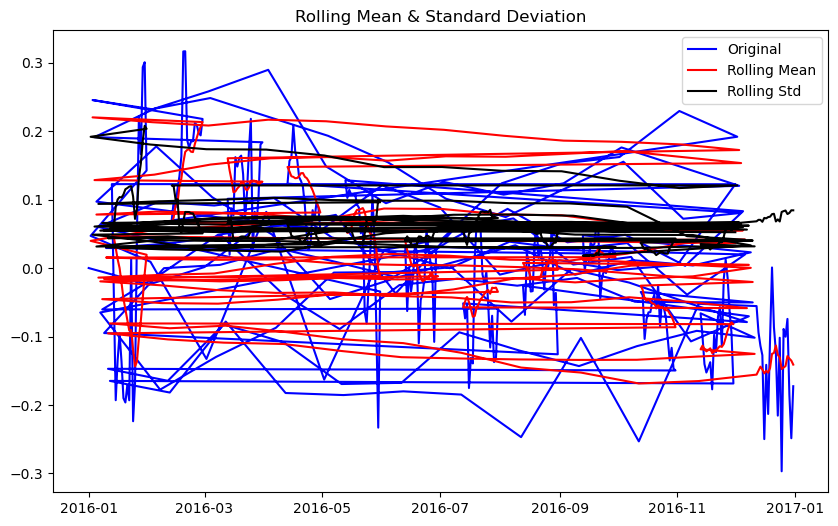

Results of Dickey Fuller Test:
Test Statistic                  -1.436074
p-value                          0.564865
#Lags Used                      11.000000
Number of Observations Used    354.000000
Critical Value (1%)             -3.448958
Critical Value (5%)             -2.869739
Critical Value (10%)            -2.571138
dtype: float64


In [114]:
dflogscaleminusexponentialdecay=df2016_log-exponentialDecayWeightedAverage
test_stationarity(dflogscaleminusexponentialdecay)

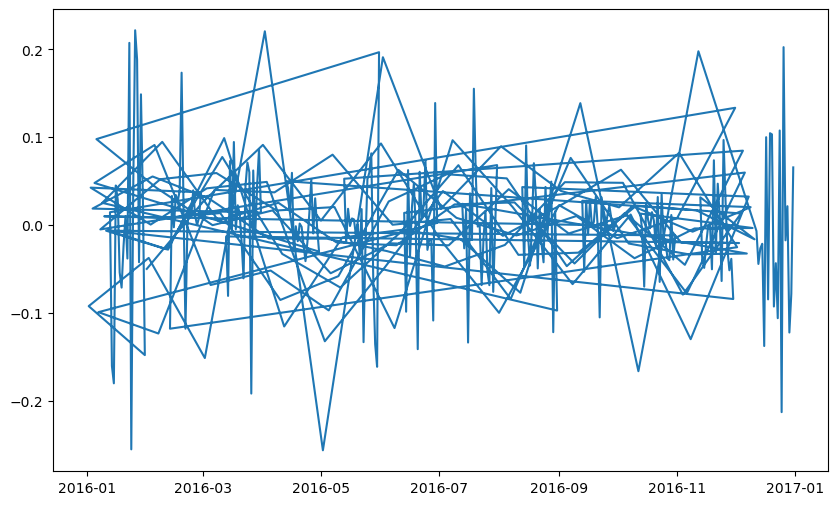

In [115]:
dflogdiffshifting=df2016_log-df2016_log.shift()
plt.plot(dflogdiffshifting)
plt.show()

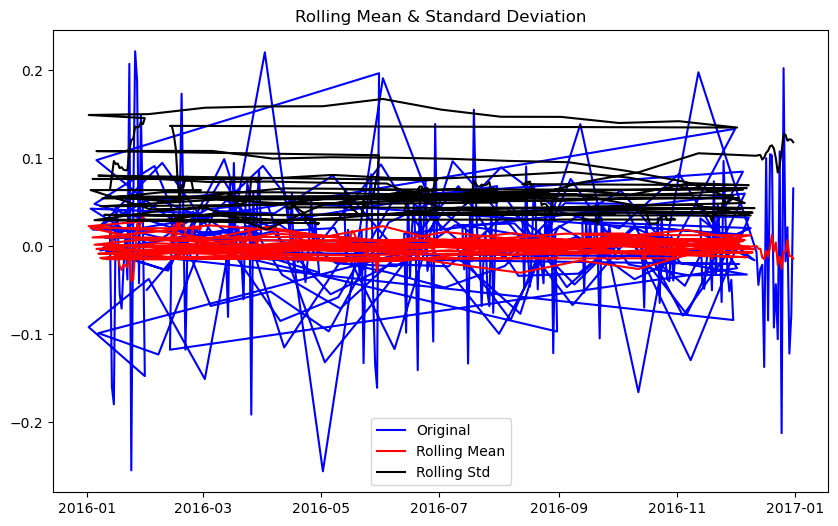

Results of Dickey Fuller Test:
Test Statistic                -1.167827e+01
p-value                        1.766523e-21
#Lags Used                     4.000000e+00
Number of Observations Used    3.600000e+02
Critical Value (1%)           -3.448646e+00
Critical Value (5%)           -2.869602e+00
Critical Value (10%)          -2.571065e+00
dtype: float64


In [116]:
dflogdiffshifting.dropna(inplace=True)
test_stationarity(dflogdiffshifting)

In [79]:
df2016_log.to_csv('df2016log.csv')
print(df2016_log)

          maximumTemp
Date                 
01-01-16     2.688819
01-02-16     2.639057
01-03-16     2.665491
01-04-16     2.756840
01-05-16     2.762117
...               ...
27-12-16     2.824351
28-12-16     2.845920
29-12-16     2.723799
30-12-16     2.645837
31-12-16     2.711553

[366 rows x 1 columns]


In [76]:
decomposition = seasonal_decompose(df2016_log) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df2016_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [131]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(dfMaxTemp)
print("ADF Statistic : %f"%result[0])
print("p-value : %f"%result[1])

ADF Statistic : -7.382304
p-value : 0.000000


C:\Users\Dell\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


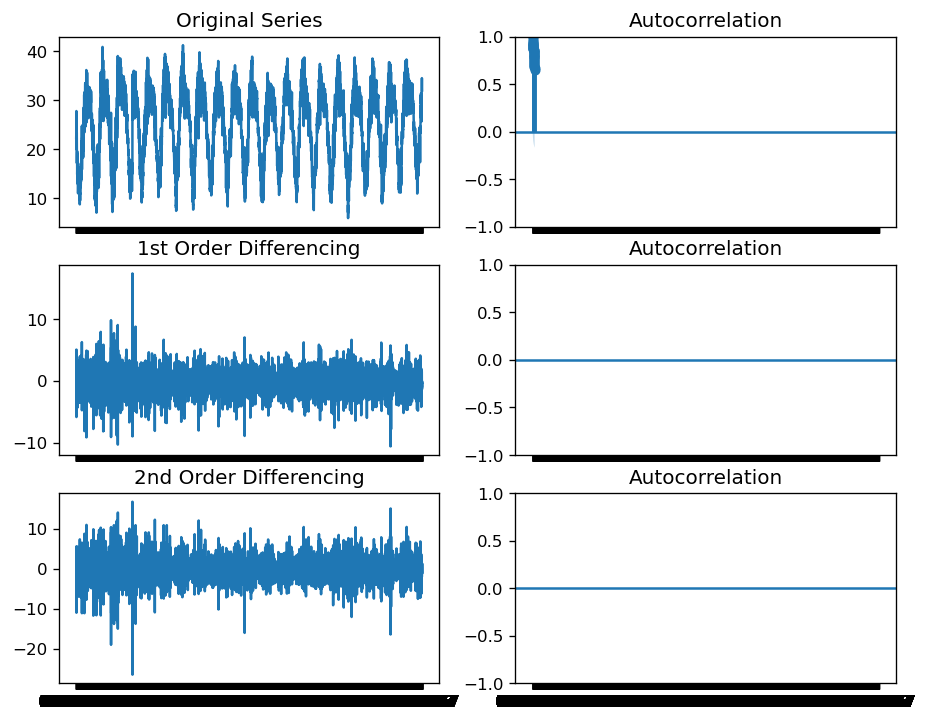

In [134]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7),'figure.dpi':120})
fig,axes=plt.subplots(3,2,sharex=True)

axes[0,0].plot(dfMaxTemp)
axes[0,0].set_title('Original Series')
plot_acf(dfMaxTemp,ax=axes[0,1])

axes[1,0].plot(dfMaxTemp.diff())
axes[1,0].set_title('1st Order Differencing')
plot_acf(dfMaxTemp.diff(),ax=axes[1,1])

axes[2,0].plot(dfMaxTemp.diff().diff())
axes[2,0].set_title('2nd Order Differencing')
plot_acf(dfMaxTemp.diff().diff(),ax=axes[2,1])

plt.show()

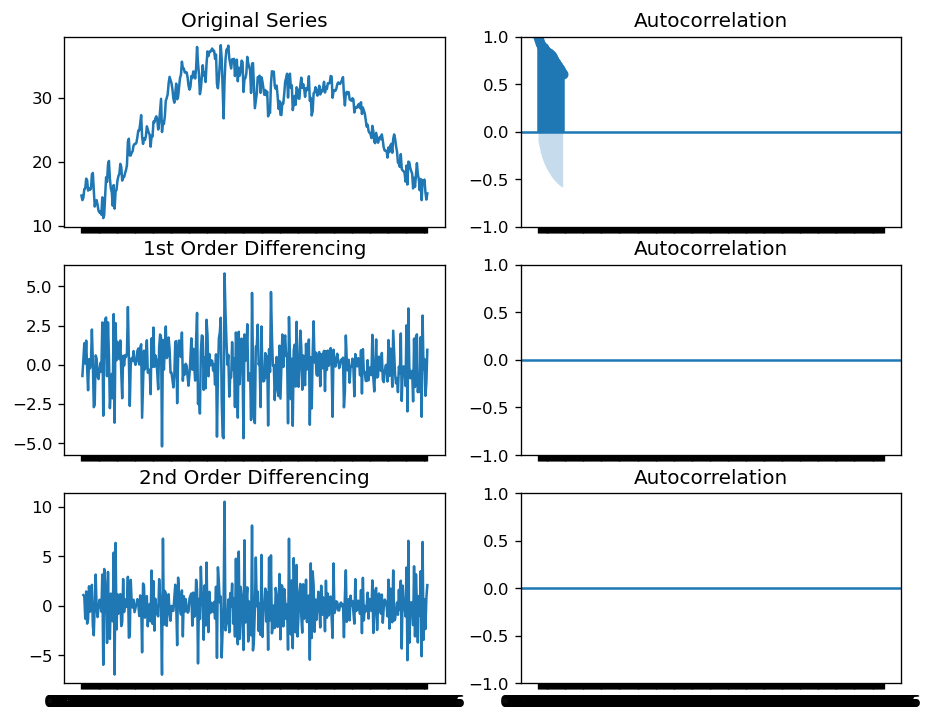

In [139]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7),'figure.dpi':120})
fig,axes=plt.subplots(3,2,sharex=True)

axes[0,0].plot(df2016)
axes[0,0].set_title('Original Series')
plot_acf(df2016,ax=axes[0,1])

axes[1,0].plot(df2016.diff())
axes[1,0].set_title('1st Order Differencing')
plot_acf(df2016.diff(),ax=axes[1,1])

axes[2,0].plot(df2016.diff().diff())
axes[2,0].set_title('2nd Order Differencing')
plot_acf(df2016.diff().diff(),ax=axes[2,1])

plt.show()

In [ ]:
from pmdarima.